In [1]:
from eda_imports import *

In [2]:
# first 3 lines are like below, probably from exporting Excel kind of tool
# YEAR 2016,,,,,,,,
# "Remuneration and Expenses for Employees Earning over $75,000",,,,,,,,
# ,,,,,,,,
%time df = pd.read_csv('data/2016StaffRemunerationOver75KWithExpenses.csv', skiprows=3)

CPU times: user 6.72 ms, sys: 1.84 ms, total: 8.56 ms
Wall time: 7.69 ms


In [3]:
df.shape

(2375, 9)

In [4]:
df.head()

,Name,Department,Title,Remuneration,Expenses,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,"Aarons, D","Finance, Risk & Supply Chain Mgt",Team Lead IV,"115,153.80",0.00,NaN,NaN,NaN,NaN
1,"Abel, K J",Fire and Rescue Services,Battalion Chief,"129,434.37",0.00,NaN,NaN,NaN,NaN
2,"Abello-Lee, A","Dev Svcs, Bldg & Licensing",Property Use Inspector I,"84,897.23",10.00,NaN,NaN,NaN,NaN
3,"Abrams, W S",Fire and Rescue Services,Fire Lieutenant,"120,272.57","1,112.12",NaN,NaN,NaN,NaN
4,"Achtymichuk, L M",Fire and Rescue Services,Fire Captain,"123,564.25",0.00,NaN,NaN,NaN,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2375 entries, 0 to 2374
Data columns (total 9 columns):
Name            2368 non-null object
Department      2368 non-null object
Title           2368 non-null object
Remuneration    2368 non-null object
Expenses        2368 non-null object
Unnamed: 5      0 non-null float64
Unnamed: 6      0 non-null float64
Unnamed: 7      0 non-null float64
Unnamed: 8      0 non-null float64
dtypes: float64(4), object(5)
memory usage: 167.1+ KB


In [6]:
df['Remuneration'] = df.Remuneration.apply(lambda v: float(v.replace(',', '')) if isinstance(v, str) else v)
df['Expenses'] = df.Expenses.apply(lambda v: float(v.replace(',', '')) if isinstance(v, str) else v)

In [7]:
df[['Remuneration', 'Expenses']].describe()

,Remuneration,Expenses
count,2368.000000,2368.000000
mean,100282.961280,377.546444
std,23480.953126,1125.654674
min,75005.570000,0.000000
25%,84911.555000,0.000000
50%,94525.975000,0.000000
75%,108916.200000,161.000000
max,328583.080000,20265.560000


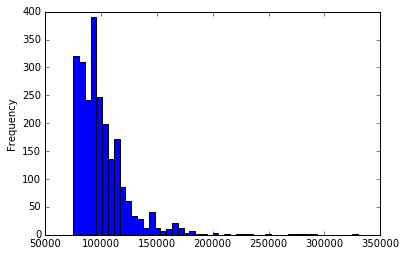

In [8]:
df.Remuneration.dropna().plot.hist(bins=np.linspace(75000, 330000, 50))

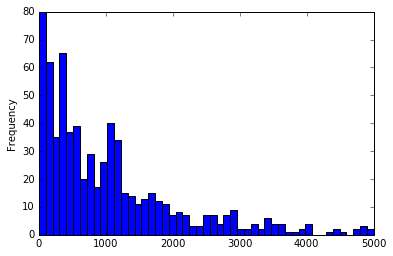

In [9]:
df.query('Expenses > 0').Expenses.dropna().plot.hist(bins=np.linspace(0, 5000, 50))

### Top paid employees

In [10]:
df.sort_values('Remuneration', ascending=False).head(20).reset_index(drop=True)

,Name,Department,Title,Remuneration,Expenses,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,"Johnston, S",Office of the City Manager,City Manager,328583.08,2953.99,NaN,NaN,NaN,NaN
1,"Connell, F J",Law Department,Director - Legal Services & City Solicitor,288924.35,0.00,NaN,NaN,NaN,NaN
2,"Impey, P M","Finance, Risk & Supply Chain Mgt",General Manager,288010.99,7884.14,NaN,NaN,NaN,NaN
3,"Bromley, M",Board of Parks & Recreation,General Manager,282996.21,281.95,NaN,NaN,NaN,NaN
4,"Latif, M A",Office of the City Manager,Chief Housing Officer,275125.44,3310.84,NaN,NaN,NaN,NaN
5,"Aujla, H B",Real Estate & Facilities Mgmt,General Manager,270895.27,7665.82,NaN,NaN,NaN,NaN
6,"Dobrovolny, J W",Engineering Services,General Manager - Engineering Services,269131.46,9456.35,NaN,NaN,NaN,NaN
7,"Mochrie, P R",Office of the City Manager,Deputy City Manager,251408.18,0.00,NaN,NaN,NaN,NaN
8,"Llewellyn-Thomas, K",Community Services,General Manager,232517.16,12509.10,NaN,NaN,NaN,NaN
9,"Singh, S",Vancouver Public Library Board,Chief Librarian,227471.15,6504.53,NaN,NaN,NaN,NaN


# Top paying departments

In [11]:
by_dept = df.groupby('Department').apply(lambda g: g.Remuneration.describe()[['count', 'mean', 'std']]).fillna(0)

In [12]:
by_dept = by_dept.sort_values('mean', ascending=False).reset_index()

(-1, 16)

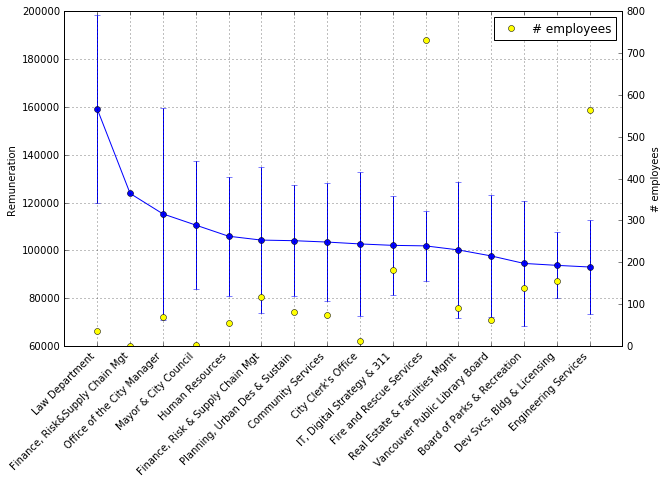

In [13]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = by_dept.index.values
ax.errorbar(xs, y=by_dept['mean'].values, marker='o', yerr=by_dept['std'].values)
ax.set_xticks(xs)
_ = ax.set_xticklabels(by_dept.Department.values, rotation=45, ha='right')
ax.set_ylabel('Remuneration')
ax.grid()

ax2 =ax.twinx()
ax2.plot(xs, by_dept['count'], 'o', color='yellow', label='# employees')
ax2.set_ylabel('# employees')
ax2.legend(numpoints=1)

ax.set_xlim(-1, xs[-1] + 1)

Error bars stand for standard deviation. When the number of empolyess from a department is small, the standard errow may be big.

# Top paying titles

In [14]:
by_title = df.groupby('Title').apply(lambda g: g.Remuneration.describe()[['count', 'mean', 'std']]).fillna(0)

In [15]:
by_title = by_title.sort_values('mean', ascending=False).reset_index()

(-1, 577)

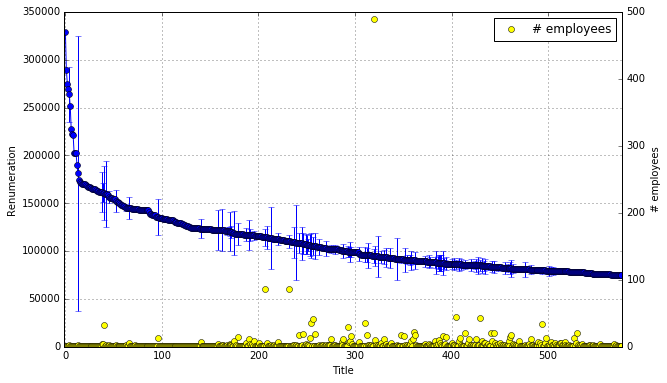

In [16]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
xs = by_title.index.values
ax.errorbar(xs, y=by_title['mean'].values, marker='o', yerr=by_title['std'].values)
# ax.set_xticks(xs)
# _ = ax.set_xticklabels(by_title.Title.values, rotation=45, ha='right')
ax.set_xlabel('Title')
ax.set_ylabel('Renumeration')
ax.grid()

ax2 =ax.twinx()
ax2.plot(xs, by_title['count'], 'o', color='yellow', label='# employees')
ax2.set_ylabel('# employees')
ax2.legend(numpoints=1)

ax.set_xlim(-1, xs[-1] + 1)

So there is a cliff for the first ~20 titles. We'll show them as well the bottom ones.

In [17]:
by_title.head(30)

Remuneration,Title,count,mean,std
0,City Manager,1.0,328583.080000,0.000000
1,Director - Legal Services & City Solicitor,1.0,288924.350000,0.000000
2,Chief Housing Officer,1.0,275125.440000,0.000000
3,General Manager - Engineering Services,1.0,269131.460000,0.000000
4,General Manager,3.0,263807.806667,28417.695093
5,Deputy City Manager,1.0,251408.180000,0.000000
6,Chief Librarian,1.0,227471.150000,0.000000
7,Fire Chief - Fire & Rescue Services,1.0,222788.590000,0.000000
8,Chief Human Resources Officer,1.0,221036.910000,0.000000
9,Director - Financial Services,1.0,202699.780000,0.000000


In [18]:
by_title.tail(20)

Remuneration,Title,count,mean,std
557,Clerk V,1.0,75990.250000,0.000000
558,Storekeeper I,1.0,75948.260000,0.000000
559,Recreation Software Analyst,1.0,75783.390000,0.000000
560,Traffic Signal Management System Technician,1.0,75664.820000,0.000000
561,Accountant - Equipment Branch,1.0,75664.820000,0.000000
562,Landscape Designer,1.0,75636.460000,0.000000
563,Cut Repair Coordinator,1.0,75600.900000,0.000000
564,Assistant Manager - Work Control & Optimization,1.0,75595.990000,0.000000
565,Driver Trainer,1.0,75551.770000,0.000000
566,Learning Support Specialist,1.0,75549.320000,0.000000
